#  <span style="color:orange">Devanshu Research Project: Chess Data Set </span>
# <span>Student ID: 991588381</span>

# Initial Steps and Getting Data

In [ ]:
#Initial Steps:
import numpy
print(numpy.__version__)

1.19.5


In [ ]:
# Installling PyCaret:
!pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Importing Data:

In [ ]:
import pandas as pd
from pycaret.utils import enable_colab
enable_colab()
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king-pawn/kr-vs-kp.data
df=pd.read_csv('/content/kr-vs-kp.data', header=None)
df.columns = ['bkblk', 'bknwy', 'bkon8', 'bkona', 'bkspr', 'bkxbq','bkxcr','bkxwp','blxwp','bxqsq','cntxt','dsopp','dwipd',
 'hdchk','katri','mulch','qxmsq','r2ar8','reskd','reskr','rimmx','rkxwp','rxmsq','simpl','skach','skewr',
 'skrxp','spcop','stlmt','thrsk','wkcti','wkna8','wknck','wkovl','wkpos','wtoeg','result']
df

Colab mode enabled.


,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,result
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3192,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3193,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3194,t,f,t,f,f,f,t,f,f,f,...,f,t,f,f,t,f,f,f,n,nowin


###Separating 10% of the data for final predictions

In [ ]:
df.shape
data = df.sample(frac=0.9, random_state=786)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2876, 37)
Unseen Data For Predictions: (320, 37)


# Setting up the Environment in PyCaret

In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'result', session_id=123) 

,Description,Value
0,session_id,123
1,Target,result
2,Target Type,Binary
3,Label Encoded,"nowin: 0, won: 1"
4,Original Data,"(2876, 37)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='result',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

# Comparing All Models

Comparing models under different requirements:

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9930,0.9929,0.9962,0.9905,0.9933,0.9861,0.9861,0.020
lightgbm,Light Gradient Boosting Machine,0.9915,0.9996,0.9933,0.9904,0.9918,0.9831,0.9831,0.053
et,Extra Trees Classifier,0.9891,0.9975,0.9894,0.9895,0.9894,0.9781,0.9782,0.185
rf,Random Forest Classifier,0.9876,0.9982,0.9894,0.9866,0.9880,0.9751,0.9752,0.219
gbc,Gradient Boosting Classifier,0.9811,0.9981,0.9750,0.9884,0.9816,0.9622,0.9625,0.149
ada,Ada Boost Classifier,0.9662,0.9950,0.9711,0.9639,0.9674,0.9324,0.9327,0.099
lr,Logistic Regression,0.9593,0.9928,0.9634,0.9583,0.9607,0.9184,0.9187,0.041
svm,SVM - Linear Kernel,0.9553,0.0000,0.9471,0.9668,0.9560,0.9106,0.9122,0.018
knn,K Neighbors Classifier,0.9409,0.9793,0.9577,0.9303,0.9436,0.8815,0.8822,0.053
lda,Linear Discriminant Analysis,0.9359,0.9842,0.9596,0.9202,0.9393,0.8715,0.8727,0.019


INFO:logs:create_model_container: 73
INFO:logs:master_model_container: 73
INFO:logs:display_container: 9
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_folds_5_recall = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9921,0.9994,0.9923,0.9923,0.9923,0.9841,0.9841,0.058
dt,Decision Tree Classifier,0.9901,0.9900,0.9933,0.9876,0.9904,0.9801,0.9801,0.014
rf,Random Forest Classifier,0.9871,0.9978,0.9875,0.9875,0.9875,0.9741,0.9742,0.238
et,Extra Trees Classifier,0.9871,0.9971,0.9865,0.9884,0.9875,0.9742,0.9742,0.216
gbc,Gradient Boosting Classifier,0.9796,0.9981,0.9721,0.9883,0.9801,0.9593,0.9595,0.152
ada,Ada Boost Classifier,0.9637,0.9949,0.9721,0.9585,0.9651,0.9274,0.9277,0.110
lr,Logistic Regression,0.9568,0.9924,0.9615,0.9554,0.9583,0.9135,0.9138,0.046
svm,SVM - Linear Kernel,0.9528,0.0000,0.9461,0.9642,0.9540,0.9056,0.9078,0.022
lda,Linear Discriminant Analysis,0.9369,0.9841,0.9586,0.9225,0.9401,0.8735,0.8746,0.024
ridge,Ridge Classifier,0.9364,0.0000,0.9577,0.9225,0.9396,0.8725,0.8736,0.016


INFO:logs:create_model_container: 129
INFO:logs:master_model_container: 129
INFO:logs:display_container: 13
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5161,0.5000,1.0000,0.5161,0.6809,0.0000,0.0000,0.010
dt,Decision Tree Classifier,0.9930,0.9929,0.9962,0.9905,0.9933,0.9861,0.9861,0.016
qda,Quadratic Discriminant Analysis,0.5509,0.6212,0.9962,0.5353,0.6962,0.0741,0.1805,0.014
lightgbm,Light Gradient Boosting Machine,0.9915,0.9996,0.9933,0.9904,0.9918,0.9831,0.9831,0.055
rf,Random Forest Classifier,0.9876,0.9982,0.9894,0.9866,0.9880,0.9751,0.9752,0.214
et,Extra Trees Classifier,0.9891,0.9975,0.9894,0.9895,0.9894,0.9781,0.9782,0.201
nb,Naive Bayes,0.6140,0.8965,0.9865,0.5738,0.7254,0.2080,0.3226,0.014
gbc,Gradient Boosting Classifier,0.9811,0.9981,0.9750,0.9884,0.9816,0.9622,0.9625,0.150
ada,Ada Boost Classifier,0.9662,0.9950,0.9711,0.9639,0.9674,0.9324,0.9327,0.098
lr,Logistic Regression,0.9593,0.9928,0.9634,0.9583,0.9607,0.9184,0.9187,0.038


INFO:logs:create_model_container: 101
INFO:logs:master_model_container: 101
INFO:logs:display_container: 11
INFO:logs:DummyClassifier(constant=None, random_state=123, strategy='prior')
INFO:logs:compare_models() succesfully completed......................................


**Since across all of these metrics, the Decision Tree model seems to be performing the best consistently overall. I will be going forward with the Decision Tree Model.**

Since the Light Gradient Boosting Machine also performs well, it will also be used.

# Decision Tree Classifier

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9901,0.9898,1.0000,0.9811,0.9905,0.9802,0.9804
2,0.9950,0.9949,1.0000,0.9905,0.9952,0.9901,0.9901
3,0.9801,0.9801,0.9808,0.9808,0.9808,0.9602,0.9602
4,0.9950,0.9948,1.0000,0.9905,0.9952,0.9900,0.9901
5,0.9851,0.9849,0.9904,0.9810,0.9856,0.9701,0.9702
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9900,0.9900,0.9904,0.9904,0.9904,0.9801,0.9801
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 130
INFO:logs:master_model_container: 130
INFO:logs:display_container: 14
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# Light Gradient Boosting Machine

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9950,0.9999,1.0000,0.9905,0.9952,0.9901,0.9901
1,0.9901,0.9988,1.0000,0.9811,0.9905,0.9802,0.9804
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9900,0.9999,0.9904,0.9904,0.9904,0.9801,0.9801
4,0.9950,1.0000,1.0000,0.9905,0.9952,0.9900,0.9901
5,0.9751,0.9982,0.9712,0.9806,0.9758,0.9502,0.9503
6,0.9900,0.9997,0.9904,0.9904,0.9904,0.9801,0.9801
7,0.9900,0.9991,0.9904,0.9904,0.9904,0.9801,0.9801
8,0.9950,1.0000,0.9904,1.0000,0.9952,0.9900,0.9901


INFO:logs:create_model_container: 132
INFO:logs:master_model_container: 132
INFO:logs:display_container: 16
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


# Tuning Decision Tree Classifier

In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9554,0.9939,0.9327,0.9798,0.9557,0.9109,0.9121
1,0.9703,0.9908,0.9519,0.9900,0.9706,0.9406,0.9413
2,0.9257,0.9894,0.8654,0.9890,0.9231,0.8519,0.8590
3,0.9353,0.9880,0.9712,0.9099,0.9395,0.8702,0.8723
4,0.9204,0.9911,0.9615,0.8929,0.9259,0.8402,0.8429
5,0.9403,0.9877,0.9808,0.9107,0.9444,0.8801,0.8829
6,0.9403,0.9916,0.9135,0.9694,0.9406,0.8807,0.8823
7,0.9502,0.9858,0.9519,0.9519,0.9519,0.9004,0.9004
8,0.9602,0.9936,0.9327,0.9898,0.9604,0.9205,0.9221


INFO:logs:create_model_container: 131
INFO:logs:master_model_container: 131
INFO:logs:display_container: 15
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# Tuning Light Gradient Boosting Machine

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9802,0.9988,0.9808,0.9808,0.9808,0.9604,0.9604
1,0.9851,0.9961,0.9808,0.9903,0.9855,0.9703,0.9703
2,0.9703,0.9992,0.9423,1.0000,0.9703,0.9406,0.9423
3,0.9900,0.9995,0.9808,1.0000,0.9903,0.9801,0.9803
4,0.9851,0.9992,0.9808,0.9903,0.9855,0.9701,0.9702
5,0.9851,0.9954,0.9808,0.9903,0.9855,0.9701,0.9702
6,0.9900,0.9996,0.9904,0.9904,0.9904,0.9801,0.9801
7,0.9900,0.9979,1.0000,0.9811,0.9905,0.9801,0.9803
8,0.9950,1.0000,0.9904,1.0000,0.9952,0.9900,0.9901


INFO:logs:create_model_container: 133
INFO:logs:master_model_container: 133
INFO:logs:display_container: 17
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


# Plot Models

## Confusion Matrix 

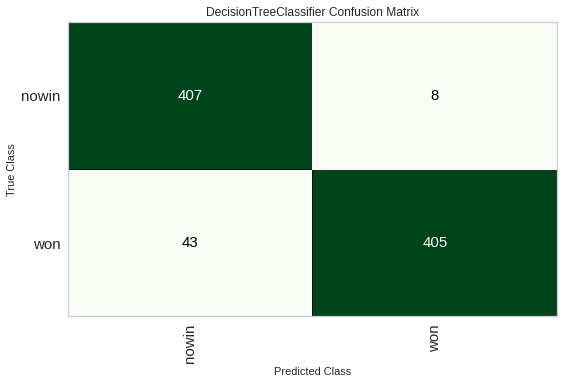

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_dt, plot = 'confusion_matrix')

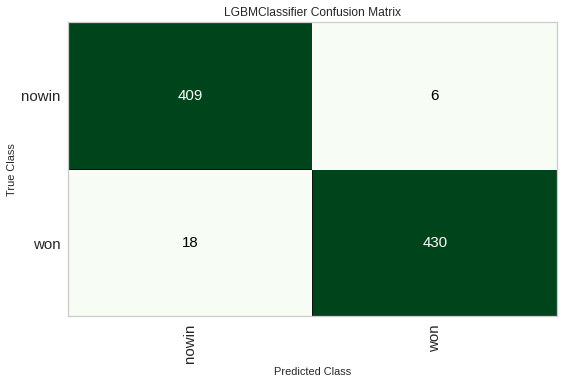

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

## Classification Report

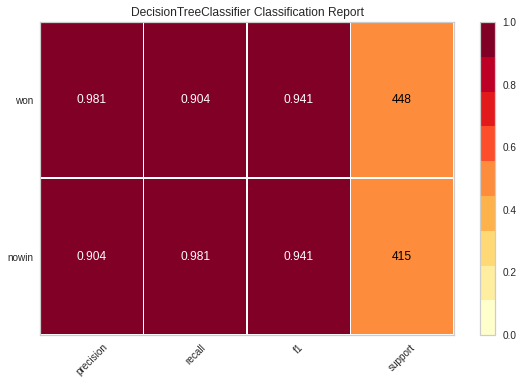

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_dt, plot = 'class_report')

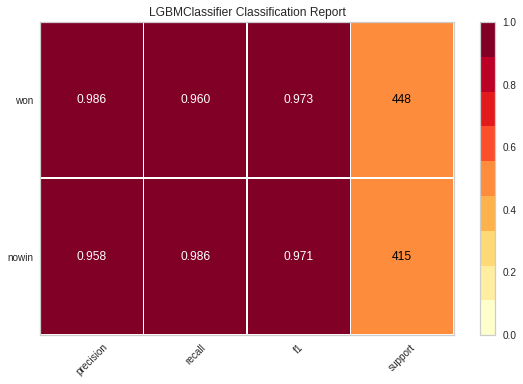

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'class_report')

## Decision Boundary Plot

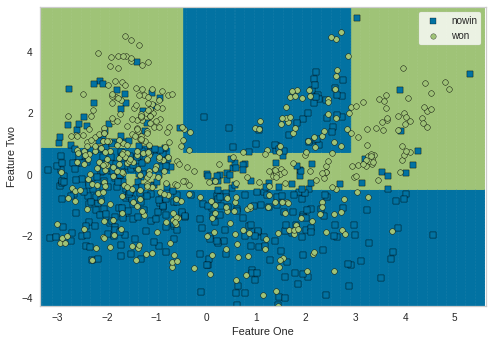

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_dt, plot='boundary')

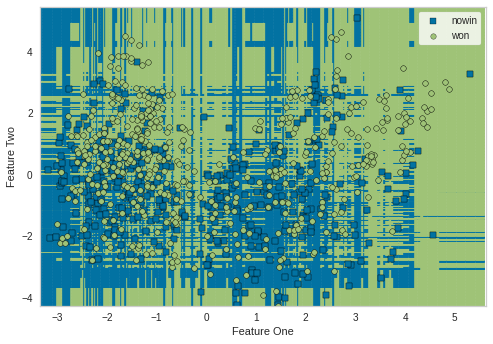

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='boundary')

## Prediction Error Plot

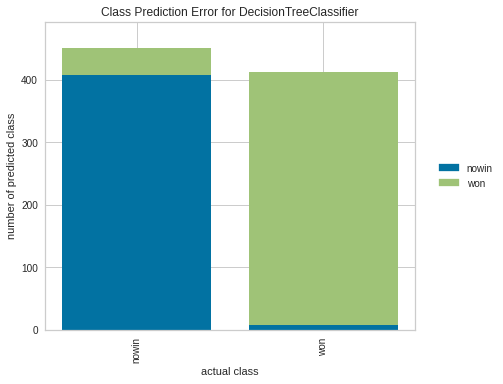

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_dt, plot = 'error')

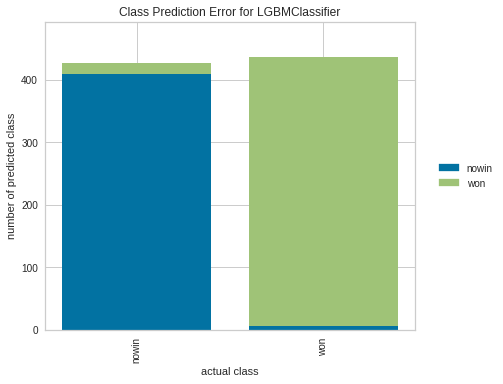

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

## Evaluating models overall

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predict on test / hold-out Sample

In [ ]:
predict_model(tuned_dt);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9409,0.9898,0.904,0.9806,0.9408,0.882,0.8849


In [ ]:
predict_model(tuned_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9722,0.9982,0.9598,0.9862,0.9729,0.9444,0.9447


***As we can see here, there is little variance in the accuracy for predictions for the remaining 30% of the dataset. Therefore, both models are good to be used.***

# Finalize Model for Deployment

Since, in all of the above metrics and plots, the Light Gradient Boosting Machine Model has been performing better than the Decision Tree Classifier. Therefore, the final selected model is the **Light Gradient Boosting Machine Model**.

In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
       

In [ ]:
#Final Light Gradient Boosting Machine parameters for deployment
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


# Predicting on unseen data

In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.9999,0,0,0,0,0


,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,result,Label,Score
0,f,f,f,f,f,f,f,f,f,f,...,t,f,f,f,t,t,n,won,won,0.9073
1,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,t,t,n,won,won,0.9105
2,f,f,f,f,f,f,f,f,t,f,...,f,t,f,f,t,t,n,won,won,0.9339
3,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,t,t,n,won,won,0.8858
4,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,t,t,n,won,won,0.9105


# Saving the model

We will now store this model for future use:

In [87]:
save_model(final_lightgbm,'Final LightGBM Model 3Dec2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), model_name=Final LightGBM Model 3Dec2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                   

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='result',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.4,
                                 max_depth=-1, min_child_samples=6,
                                 min_child_weight=0.

# Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [88]:
saved_final_lighgbm = load_model('Final LightGBM Model 3Dec2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final LightGBM Model 3Dec2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used above.

In [89]:
new_prediction = predict_model(saved_final_lighgbm, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='result',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                                colsample_bytree=1.0, feature_fraction=0.5,
                                importance_type='split', learning_rate=0.4,
                                max_depth=-1, min_child_sample

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.9999,0,0,0,0,0


In [90]:
new_prediction.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,result,Label,Score
0,f,f,f,f,f,f,f,f,f,f,...,t,f,f,f,t,t,n,won,won,0.9073
1,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,t,t,n,won,won,0.9105
2,f,f,f,f,f,f,f,f,t,f,...,f,t,f,f,t,t,n,won,won,0.9339
3,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,t,t,n,won,won,0.8858
4,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,t,t,n,won,won,0.9105


# Conclusion

As we could see in above, after our initial comparison of all the models we were left with Decion Tree classifier being our possible best choice and the Light Gradient Boosting Machine Model being the second best choice, but after comparing results from all the models, it turned out to be that the Light Gradient Boosting Machine Model was our best choice for predicting the resulst of the Chess Data Set. 

Which is why we went with the Light Gradient Boosting Machine Model and saved it for future use.